# Data & Library

In [1]:
## 필요한 라이브러리 설치하기
!pip install pytimekr
!pip install xlrd
!pip install openpyxl
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import glob
from pytimekr import pytimekr

## 날씨

In [3]:
# 날씨데이터 불러오기 (2016 ~ 2019)
weather = pd.DataFrame()

for i in glob.glob('./seoul_data/weather/**.csv'):
    temp = pd.read_csv(i,encoding='euc-kr')
    weather = pd.concat([weather,temp], sort = False)
    
weather['일시'] = pd.to_datetime(weather['일시'])
weather = weather.loc[:,['일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)',
                         '평균 풍속(m/s)', '평균 상대습도(%)', '가조시간(hr)', '평균 전운량(1/10)',
                         '일 최심신적설(cm)', '일 최심적설(cm)', '안개 계속시간(hr)']]
weather.columns.values[0] = '대여일자'
weather = weather.fillna(0)
weather.head(5)

,대여일자,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),일 최심신적설(cm),일 최심적설(cm),안개 계속시간(hr)
0,2018-01-01,-1.3,-5.1,3.8,0.0,1.4,39.1,9.6,1.0,0.0,0.0,0.0
1,2018-01-02,-1.8,-4.3,1.8,0.0,1.8,42.0,9.6,2.3,0.0,0.0,0.0
2,2018-01-03,-4.7,-7.1,-0.4,0.0,2.2,42.3,9.7,3.6,0.0,0.0,0.0
3,2018-01-04,-4.7,-8.7,-0.7,0.0,1.4,43.0,9.7,6.5,0.0,0.0,0.0
4,2018-01-05,-3.0,-5.6,1.6,0.0,1.7,48.4,9.7,3.6,0.0,0.0,0.0


In [4]:
# 미세먼지 데이터 불러오기 (2016 ~ 2019)
dust = pd.DataFrame()

for i in glob.glob('./seoul_data/dust/**.xlsx'):
    temp = pd.read_excel(i)
    temp = temp.groupby(['측정일자']).mean()
    dust = pd.concat([dust,temp], sort=False)
    
dust = dust.reset_index()
dust['측정일자'] = pd.to_datetime(dust['측정일자'], format='%Y%m%d')
dust = dust.drop(['권역코드','측정소코드'],axis=1)
dust.columns.values[0] = '대여일자'

dust.head(5)

,대여일자,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥)
0,2019-01-01,39.36,26.12,0.01472,0.03156,0.692,0.00428
1,2019-01-02,33.08,21.36,0.01256,0.03524,0.676,0.00464
2,2019-01-03,38.80,23.36,0.00716,0.04344,0.736,0.00504
3,2019-01-04,59.44,40.36,0.00368,0.05896,1.060,0.00600
4,2019-01-05,65.72,42.52,0.01788,0.02812,0.644,0.00512


In [5]:
# 자전거 데이터 불러오기 (2016 ~ 2019)
bike = pd.DataFrame()

for i in glob.glob('./seoul_data/bike-share/**.xlsx'):
    temp = pd.read_excel(i)
    temp = temp.groupby(['대여일자']).sum()
    temp = temp.reset_index()
    bike = pd.concat([bike,temp], sort = False)
    
bike

,대여일자,대여건수
0,2018-01-01,4950
1,2018-01-02,7136
2,2018-01-03,7156
3,2018-01-04,7102
4,2018-01-05,7705
...,...,...
361,2016-12-27,3234
362,2016-12-28,3158
363,2016-12-29,2447
364,2016-12-30,2977


In [6]:
data = pd.merge(weather,dust,on='대여일자').merge(bike,on='대여일자')
data

,대여일자,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),일 최심신적설(cm),일 최심적설(cm),안개 계속시간(hr),미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥),대여건수
0,2018-01-01,-1.3,-5.1,3.8,0.0,1.4,39.1,9.6,1.0,0.0,0.0,0.0,38.56,0.01128,0.03064,0.580,0.00540,20.12,4950
1,2018-01-02,-1.8,-4.3,1.8,0.0,1.8,42.0,9.6,2.3,0.0,0.0,0.0,39.12,0.01020,0.03544,0.724,0.00520,21.88,7136
2,2018-01-03,-4.7,-7.1,-0.4,0.0,2.2,42.3,9.7,3.6,0.0,0.0,0.0,33.88,0.01556,0.02168,0.452,0.00508,18.24,7156
3,2018-01-04,-4.7,-8.7,-0.7,0.0,1.4,43.0,9.7,6.5,0.0,0.0,0.0,43.88,0.00968,0.03296,0.556,0.00512,23.84,7102
4,2018-01-05,-3.0,-5.6,1.6,0.0,1.7,48.4,9.7,3.6,0.0,0.0,0.0,55.72,0.00776,0.04060,0.688,0.00568,35.60,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2016-12-27,-2.3,-6.3,1.3,0.5,3.5,54.6,9.6,2.8,0.5,0.5,0.0,41.12,0.01888,0.01868,0.512,0.00476,26.56,3234
1388,2016-12-28,-3.7,-8.4,2.6,0.0,1.8,49.0,9.6,1.9,0.0,0.0,0.0,44.24,0.00880,0.03580,0.604,0.00500,24.88,3158
1389,2016-12-29,-4.2,-7.2,-1.1,0.3,2.8,53.1,9.6,1.5,1.0,1.0,0.0,35.24,0.01348,0.02576,0.496,0.00452,15.68,2447
1390,2016-12-30,-3.9,-9.1,1.0,0.0,1.3,50.9,9.6,3.0,0.0,0.0,0.0,41.80,0.00588,0.04156,0.748,0.00548,23.72,2977


## 요일 계산 및 주말 처리

In [7]:
def season(x):
    date = x.month*100 + x.day
    if date >= 204 and date < 505: # spring
        return 1
    elif date >= 505 and date < 807: # summer
        return 2
    elif date >= 807 and date < 1107: # fall
        return 3
    elif date >= 1107 or date < 204: # winter
        return 4
    
def year(x):
    year = x.year
    if year == 2016:
        return 0
    elif year == 2017:
        return 1
    elif year == 2018:
        return 2
    else:
        return 3
    
def month(x):
    month = x.month
    return month

def h(x):
    if x == 5 or x == 6:
        return 1
    else:
        return 0
    
data['weekday'] = data['대여일자'].dt.weekday    
data['season'] = data['대여일자'].apply(season).astype('category')   
data['year'] = data['대여일자'].apply(year).astype('category')
data['month'] = data['대여일자'].apply(month).astype('category')
data['holiday'] = data['weekday'].apply(h).astype('category')

data.index = data['대여일자'].values
data.drop(['대여일자'], axis = 1, inplace=True)

In [8]:
data_columns = ['temp', 'min_temp', 'max_temp', 'precipitation', 'windspeed', 'hum', 'sunshine', 'cloud', 
                'max_snowcover', 'snowcover', 'mist', 'PM', 'finePM', 
                'O3', 'NO2', 'CO', 'SO2', 'cnt', 'weekday','season' ,'year' ,'month', 'holiday']
data.columns = data_columns

## 연휴

In [9]:
#!pip install pytimekr
#!pip install xlrd

In [10]:
year = [2016, 2017, 2018, 2019]

holidays = []
for yr in year:
    holidays.extend(pytimekr.holidays(yr))
holidays

[datetime.date(2016, 2, 7),
 datetime.date(2016, 2, 8),
 datetime.date(2016, 2, 9),
 datetime.date(2016, 9, 14),
 datetime.date(2016, 9, 15),
 datetime.date(2016, 9, 16),
 datetime.date(2016, 1, 1),
 datetime.date(2016, 3, 1),
 datetime.date(2016, 5, 5),
 datetime.date(2016, 5, 14),
 datetime.date(2016, 6, 6),
 datetime.date(2016, 8, 15),
 datetime.date(2016, 10, 9),
 datetime.date(2016, 10, 3),
 datetime.date(2016, 12, 25),
 datetime.date(2017, 1, 27),
 datetime.date(2017, 1, 28),
 datetime.date(2017, 1, 29),
 datetime.date(2017, 10, 3),
 datetime.date(2017, 10, 4),
 datetime.date(2017, 10, 5),
 datetime.date(2017, 1, 1),
 datetime.date(2017, 3, 1),
 datetime.date(2017, 5, 5),
 datetime.date(2017, 5, 3),
 datetime.date(2017, 6, 6),
 datetime.date(2017, 8, 15),
 datetime.date(2017, 10, 9),
 datetime.date(2017, 10, 3),
 datetime.date(2017, 12, 25),
 datetime.date(2018, 2, 15),
 datetime.date(2018, 2, 16),
 datetime.date(2018, 2, 17),
 datetime.date(2018, 9, 23),
 datetime.date(2018, 9, 

In [11]:
for d in holidays:
    if d in data.index and data.loc[d, 'holiday'] == 0:
        data.loc[d, 'holiday'] = 1
    else:
        continue

data = data[['season', 'year', 'month', 'weekday', 'holiday',
              'temp', 'min_temp', 'max_temp', 'precipitation', 'windspeed', 'hum',
              'sunshine', 'cloud', 'max_snowcover', 'snowcover', 'mist',
              'PM', 'finePM', 'O3', 'NO2', 'CO', 'SO2', 'cnt']]

|속성|설명|
|-|-|
|**season**|계절</br> 1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울|
|**year**|연</br> 0 : 2016년, 1 : 2017년, 2 : 2018년, 3 : 2019년|
|**month**|월|
|**weekday**|요일</br> 0 : 월요일, 1 : 화요일, 2 : 수요일, 3 : 목요일, 4 : 금요일, 5 : 토요일, 6 : 일요일|
|**holiday**|주말 및 공휴일을 포함한 휴일(대체공휴일, 선거일 미포함)|
|**temp**|평균기온(°C)|
|**min_temp**|최저기온(°C)|
|**max_temp**|최고기온(°C)|
|**precipitation**|일강수량(mm)|
|**windspeed**|평균 풍속(m/s)|
|**hum**|평균 상대습도(%)|
|**sunshine**|가조시간(hr)|
|**cloud**|평균 전운량(1/10)|
|**max_snowcover**|일 최심신적설(cm)|
|**snowcover**|일 최심적설(cm)|
|**mist**|안개 계속시간(hr)|
|**PM**|미세먼지(㎍/㎥)|
|**finePM**|초미세먼지(㎍/㎥)|
|**O3**|오존(ppm)|
|**NO2**|이산화질소농도(ppm)|
|**CO**|일산화탄소농도(ppm)|
|**SO2**|아황산가스농도(ppm)|
|**cnt**|대여건수(대)|



In [12]:
data.columns

Index(['season', 'year', 'month', 'weekday', 'holiday', 'temp', 'min_temp',
       'max_temp', 'precipitation', 'windspeed', 'hum', 'sunshine', 'cloud',
       'max_snowcover', 'snowcover', 'mist', 'PM', 'finePM', 'O3', 'NO2', 'CO',
       'SO2', 'cnt'],
      dtype='object')

# 시계열분해

In [13]:
!pip install statsmodels --upgrade

In [14]:
data1=data.sort_index()

In [15]:
data1

,season,year,month,weekday,holiday,temp,min_temp,max_temp,precipitation,windspeed,...,max_snowcover,snowcover,mist,PM,finePM,O3,NO2,CO,SO2,cnt
2016-01-01,4,0,1,4,0,1.2,-3.3,4.0,0.0,1.6,...,0.0,0.0,0.0,68.36,0.00584,0.04736,0.96000,0.00576,44.64000,523
2016-01-02,4,0,1,5,1,5.7,1.0,9.5,0.0,2.0,...,0.0,0.0,0.0,51.40,0.00944,0.04352,0.70400,0.00576,31.36000,750
2016-01-03,4,0,1,6,1,6.5,5.1,9.4,0.0,1.8,...,0.0,0.0,0.0,88.40,0.01324,0.04892,0.91200,0.00688,58.12000,679
2016-01-04,4,0,1,0,0,2.0,-2.5,5.3,0.0,3.1,...,0.0,0.0,0.0,74.20,0.02500,0.02540,0.61200,0.00604,46.92000,841
2016-01-05,4,0,1,1,0,-2.7,-4.8,1.5,0.0,2.3,...,0.0,0.0,0.0,32.20,0.01644,0.02488,0.41200,0.00564,16.36000,789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4,3,12,4,0,-1.7,-4.6,2.6,0.0,2.1,...,0.0,0.0,0.0,34.16,23.36000,0.01956,0.02608,0.53200,0.00328,29243
2019-12-28,4,3,12,5,1,1.1,-3.6,6.1,0.0,2.0,...,0.0,0.0,0.0,42.04,24.72000,0.00620,0.04324,0.67600,0.00372,26046
2019-12-29,4,3,12,6,1,3.8,1.1,6.2,1.4,2.9,...,0.0,0.0,0.0,45.36,27.48000,0.00892,0.03732,0.66000,0.00348,18701
2019-12-30,4,3,12,0,0,2.7,-5.7,6.8,0.4,2.9,...,0.0,0.0,0.0,36.76,25.68000,0.01132,0.03304,0.62800,0.00308,22952


<Figure size 7200x5760 with 0 Axes>

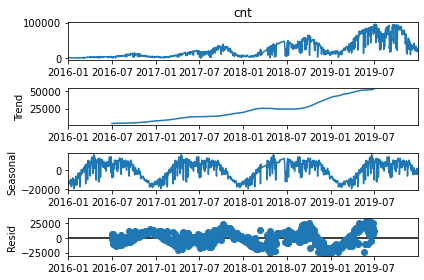

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(data1.cnt,period=365)

plt.figure(figsize=(100,80))

fig = decomposition.plot()
plt.show()
fig.savefig('decomposition.png')

In [17]:
data2=data1.reset_index().rename(columns={'index':'rdate'})
new_data=data2.reset_index().rename(columns={'index':'T'})

In [18]:
new_data

,T,rdate,season,year,month,weekday,holiday,temp,min_temp,max_temp,...,max_snowcover,snowcover,mist,PM,finePM,O3,NO2,CO,SO2,cnt
0,0,2016-01-01,4,0,1,4,0,1.2,-3.3,4.0,...,0.0,0.0,0.0,68.36,0.00584,0.04736,0.96000,0.00576,44.64000,523
1,1,2016-01-02,4,0,1,5,1,5.7,1.0,9.5,...,0.0,0.0,0.0,51.40,0.00944,0.04352,0.70400,0.00576,31.36000,750
2,2,2016-01-03,4,0,1,6,1,6.5,5.1,9.4,...,0.0,0.0,0.0,88.40,0.01324,0.04892,0.91200,0.00688,58.12000,679
3,3,2016-01-04,4,0,1,0,0,2.0,-2.5,5.3,...,0.0,0.0,0.0,74.20,0.02500,0.02540,0.61200,0.00604,46.92000,841
4,4,2016-01-05,4,0,1,1,0,-2.7,-4.8,1.5,...,0.0,0.0,0.0,32.20,0.01644,0.02488,0.41200,0.00564,16.36000,789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1387,2019-12-27,4,3,12,4,0,-1.7,-4.6,2.6,...,0.0,0.0,0.0,34.16,23.36000,0.01956,0.02608,0.53200,0.00328,29243
1388,1388,2019-12-28,4,3,12,5,1,1.1,-3.6,6.1,...,0.0,0.0,0.0,42.04,24.72000,0.00620,0.04324,0.67600,0.00372,26046
1389,1389,2019-12-29,4,3,12,6,1,3.8,1.1,6.2,...,0.0,0.0,0.0,45.36,27.48000,0.00892,0.03732,0.66000,0.00348,18701
1390,1390,2019-12-30,4,3,12,0,0,2.7,-5.7,6.8,...,0.0,0.0,0.0,36.76,25.68000,0.01132,0.03304,0.62800,0.00308,22952


In [19]:
new_data.to_csv('seoul_data_full.csv',index = False)

In [20]:
##구간으로 나눠서 실행 
# datat는 의미가 있어서 구간을 나눠서 진행한다. train_test_split사용하지않음.
train = new_data[new_data.rdate<'2019-07-01']
test = new_data[new_data.rdate>='2019-07-01']

train.to_csv('seoul_data_train.csv',index = False)
test.to_csv('seoul_data_test.csv',index = False)

X_train = train.drop(['cnt','rdate'],axis=1)
y_train = train['cnt']
X_test = test.drop(['cnt','rdate'],axis=1)
y_test = test['cnt']
X_train

,T,season,year,month,weekday,holiday,temp,min_temp,max_temp,precipitation,...,cloud,max_snowcover,snowcover,mist,PM,finePM,O3,NO2,CO,SO2
0,0,4,0,1,4,0,1.2,-3.3,4.0,0.0,...,7.0,0.0,0.0,0.0,68.36,0.00584,0.04736,0.96000,0.00576,44.64000
1,1,4,0,1,5,1,5.7,1.0,9.5,0.0,...,7.8,0.0,0.0,0.0,51.40,0.00944,0.04352,0.70400,0.00576,31.36000
2,2,4,0,1,6,1,6.5,5.1,9.4,0.0,...,7.5,0.0,0.0,0.0,88.40,0.01324,0.04892,0.91200,0.00688,58.12000
3,3,4,0,1,0,0,2.0,-2.5,5.3,0.0,...,4.4,0.0,0.0,0.0,74.20,0.02500,0.02540,0.61200,0.00604,46.92000
4,4,4,0,1,1,0,-2.7,-4.8,1.5,0.0,...,3.4,0.0,0.0,0.0,32.20,0.01644,0.02488,0.41200,0.00564,16.36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1205,2,3,6,2,0,25.5,20.7,29.5,0.0,...,9.5,0.0,0.0,0.0,33.20,22.84000,0.04156,0.02984,0.42800,0.00372
1206,1206,2,3,6,3,0,25.5,21.9,31.2,1.4,...,8.3,0.0,0.0,0.0,20.24,14.16000,0.03936,0.01896,0.35200,0.00316
1207,1207,2,3,6,4,0,24.7,22.3,29.0,0.0,...,8.5,0.0,0.0,0.0,41.28,32.92000,0.03172,0.02780,0.49200,0.00440
1208,1208,2,3,6,5,1,23.1,19.6,27.7,1.5,...,8.1,0.0,0.0,0.0,24.48,19.48000,0.02956,0.01868,0.38000,0.00348


# 모델 실행해보기 
date의 기능을 넣고 싶어서 T변수를 넣어서 진행한 것이다. 

Case1 : 'T'변수를 넣지않고   
X_train = X_train.drop(['T'],axis=1)  
y_test = X_test.drop(['T'],axis=1)  

Case2 : 'T'변수를 넣어서 

#### case2

In [21]:
# X_train = X_train.drop(['T'],axis=1)
# y_test = X_test.drop(['T'],axis=1)

In [22]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 1210 rows
Test Set: 182 rows


In [23]:
## LinearRegression
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


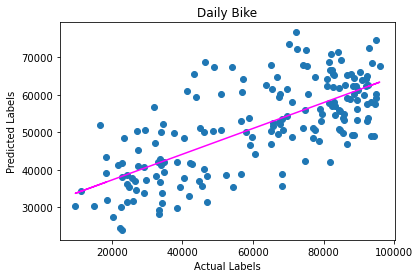

In [24]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 437290306.293922
RMSE: 20911.487424234605
R2: 0.2973313876971999


Lasso() 

MSE: 435299474.33833045
RMSE: 20863.831727138004
R2: 0.3005303955586349


/anaconda/envs/py37_default/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46145243103.5156, tolerance: 46743371.73097521
  positive)


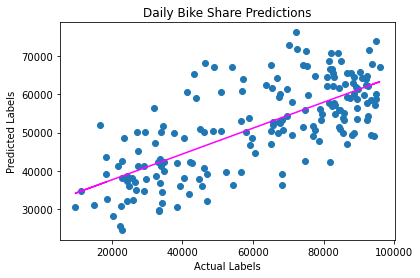

In [26]:
## Lasso
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [27]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_0 <= 822.50
|   |--- feature_0 <= 461.50
|   |   |--- feature_3 <= 7.50
|   |   |   |--- feature_0 <= 422.50
|   |   |   |   |--- feature_0 <= 76.50
|   |   |   |   |   |--- feature_0 <= 60.50
|   |   |   |   |   |   |--- feature_19 <= 0.02
|   |   |   |   |   |   |   |--- feature_19 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_7 <= -17.00
|   |   |   |   |   |   |   |   |   |--- value: [137.00]
|   |   |   |   |   |   |   |   |--- feature_7 >  -17.00
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [339.00]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_17 <= 30.55
|   |   |   |   |   |   |   |   |   |   |   |--- value: [252.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_17 >  30.55
|   |   |   |   |   |   |   |   |   |   |   |--- value: [242.00]
|   |   |   |   |   |   |   |--- feature_19 >  0.02
|   | 

MSE: 822536712.5274725
RMSE: 28679.900845844506
R2: -0.3217094503149285


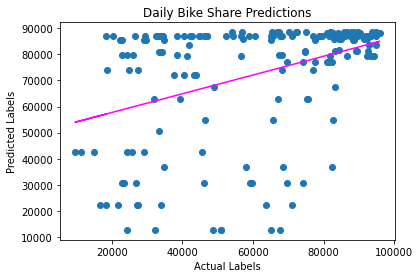

In [28]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 407498077.4988215
RMSE: 20186.581619947978
R2: 0.3452036221454754


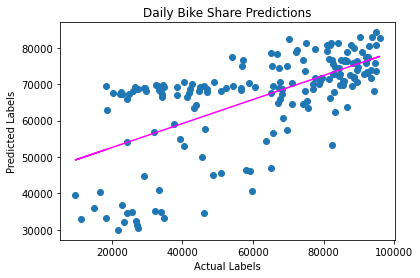

In [29]:
## RandomForest
## 분산을 적게 만드는게 목적 : Bagging
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 182396288.90862295
RMSE: 13505.417020907682
R2: 0.7069129011735789


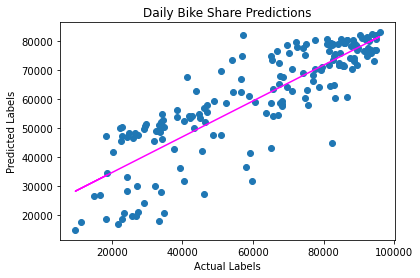

In [30]:
## Boost
## 편차를 적게 하는 것이 목표 : Boost
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 176525313.33330405
RMSE: 13286.282901297263
R2: 0.716346794861586


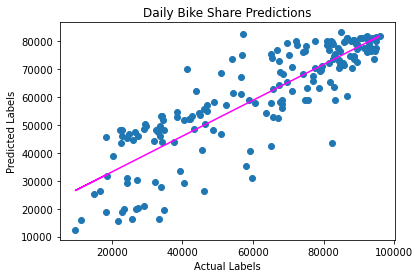

In [31]:
## 최적을 찾아보기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

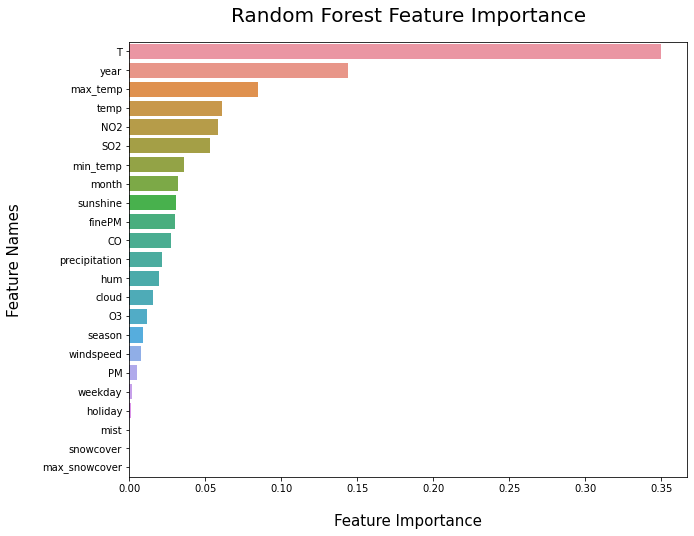

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(n_estimators=1000, max_features = int(len(X_train.columns)/3),random_state=1234)
rf.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns

fi = pd.DataFrame({'Feature' : X_train.columns, 'Value' : rf.feature_importances_})
fi2 = fi.sort_values('Value',ascending=False)

plt.figure(figsize=(10,8))

b = sns.barplot(x=fi2['Value'], y=fi2['Feature'])
b.axes.set_title('Random Forest Feature Importance',fontsize=20, pad=20)
b.set_xlabel('Feature Importance',fontsize=15, labelpad = 20)
b.set_ylabel('Feature Names',fontsize=15, labelpad = 20)
b.figure.savefig('Feature_Importance.png', bbox_inches='tight')

#### case1

In [33]:
X_train = X_train.drop(['T'],axis=1)
y_test = X_test.drop(['T'],axis=1)

In [34]:
# 방법2: Separate features and labels
## Non T변수 
X_train, y_train = train[['season', 'year', 'month', 'weekday', 'holiday',
              'temp', 'min_temp', 'max_temp', 'precipitation', 'windspeed', 'hum',
              'sunshine', 'cloud', 'max_snowcover', 'snowcover', 'mist',
              'PM', 'finePM', 'O3', 'NO2', 'CO', 'SO2']], train['cnt']
X_test, y_test = test[['season', 'year', 'month', 'weekday', 'holiday',
              'temp', 'min_temp', 'max_temp', 'precipitation', 'windspeed', 'hum',
              'sunshine', 'cloud', 'max_snowcover', 'snowcover', 'mist',
              'PM', 'finePM', 'O3', 'NO2', 'CO', 'SO2']], test['cnt']
#print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

In [35]:
## LinearRegression
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


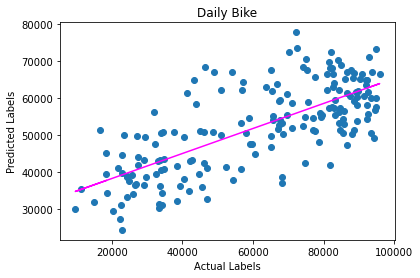

In [36]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 420614942.7224905
RMSE: 20508.89911044692
R2: 0.3241265267884076


Lasso() 

MSE: 422619992.78832775
RMSE: 20557.723433987718
R2: 0.3209046722741835


/anaconda/envs/py37_default/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42455103960.624725, tolerance: 46743371.73097521
  positive)


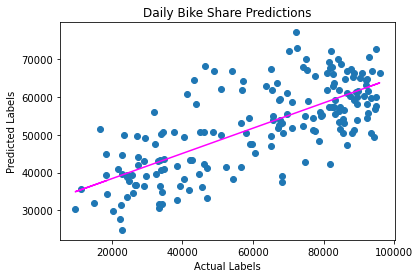

In [38]:
## Lasso
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [39]:
## DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_1 <= 1.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 7.50
|   |   |   |--- feature_7 <= 18.65
|   |   |   |   |--- feature_11 <= 11.95
|   |   |   |   |   |--- feature_11 <= 11.55
|   |   |   |   |   |   |--- feature_18 <= 0.03
|   |   |   |   |   |   |   |--- feature_11 <= 9.85
|   |   |   |   |   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= -4.15
|   |   |   |   |   |   |   |   |   |   |--- value: [594.00]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  -4.15
|   |   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_18 >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_3 >  4.50
|   |   |   |   |   |   |   |   |   |--- feature_16 <= 34.48
|   |   |   |   |   |   |   |   |   |

MSE: 395308746.28571427
RMSE: 19882.372752911415
R2: 0.36479029105886374


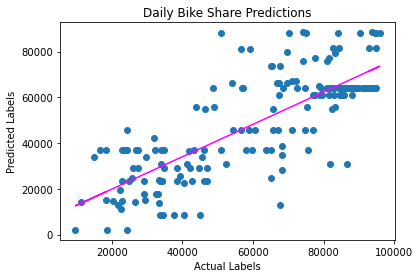

In [40]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 334305839.242584
RMSE: 18284.032357294273
R2: 0.46281402362617496


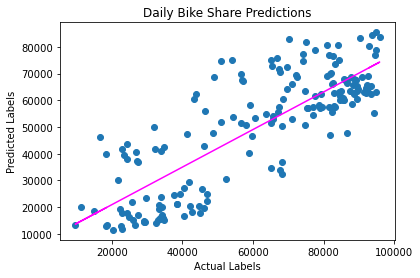

In [41]:
## RandomForest
## 분산을 적게 만드는게 목적 : Bagging
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 187150201.90946314
RMSE: 13680.285154537647
R2: 0.699273981665806


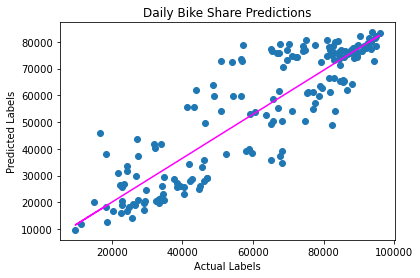

In [42]:
## Boost
## 편차를 적게 하는 것이 목표 : Boost
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 171768849.84989962
RMSE: 13106.061568980196
R2: 0.7239898126629143


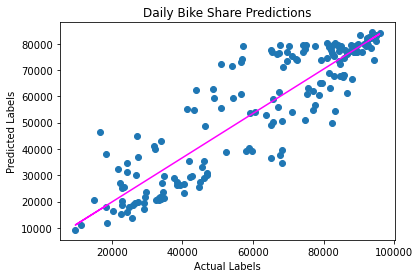

In [43]:
## 최적을 찾아보기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

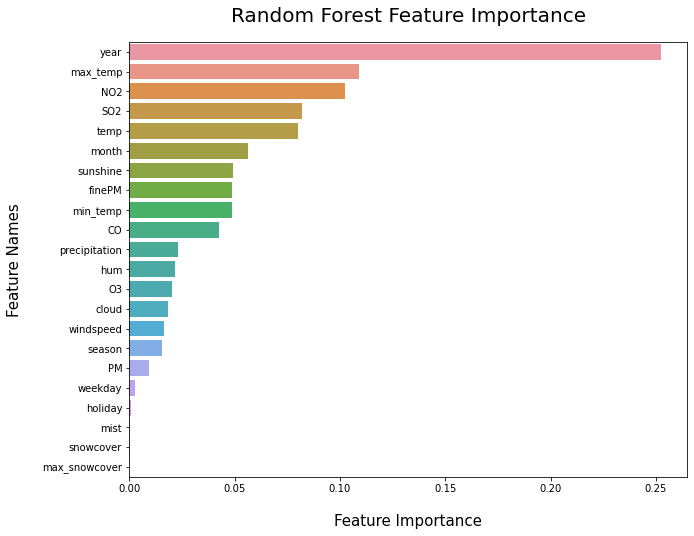

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(n_estimators=1000, max_features = int(len(X_train.columns)/3),random_state=1234)
rf.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns

fi = pd.DataFrame({'Feature' : X_train.columns, 'Value' : rf.feature_importances_})
fi2 = fi.sort_values('Value',ascending=False)

plt.figure(figsize=(10,8))

b = sns.barplot(x=fi2['Value'], y=fi2['Feature'])
b.axes.set_title('Random Forest Feature Importance',fontsize=20, pad=20)
b.set_xlabel('Feature Importance',fontsize=15, labelpad = 20)
b.set_ylabel('Feature Names',fontsize=15, labelpad = 20)
b.figure.savefig('Feature_Importance.png', bbox_inches='tight')